In [ ]:
import pandas as pd
import mysql.connector
import seaborn as sns

In [ ]:
cnx = mysql.connector.connect(host= 'database-1.cnp2v41lukiw.us-east-2.rds.amazonaws.com',
                              user= 'Jackson',
                              passwd='1234',
                              database='themoviedb'
)
cursor = cnx.cursor()

In [3]:
results = cursor.execute('''SELECT * FROM The_Big_Table''')

In [4]:
results = cursor.fetchall()

In [5]:
df = pd.DataFrame(results)


In [53]:
df['ID'] = df['ID'].astype('int64')

In [35]:
#import budget cvs

budget_df = pd.read_csv('budget_df.csv')

In [56]:
budget_df['ID']

0      419704
1      335988
2      290859
3      299536
4      429617
        ...  
713    577902
714    472849
715    444922
716    404798
717    390149
Name: ID, Length: 718, dtype: int64

In [43]:
budget_df = budget_df.rename(columns={'id':'ID'})

In [58]:
#merge budget df with movie df

df5 = df.merge(budget_df, on='ID', how='inner')

In [70]:
df5.drop(df5[df5['revenue'] == 0].index, inplace=True)

In [75]:
#create a new column for profit
df5['profit'] = df5.apply(lambda row: (row['revenue'] - 
                                  row['budget']), axis = 1)

In [76]:
df5

,ID,Title,Release Date,Popularity,Vote AVG,Vote Count,Genre ID,Original Language,MetaCritic Score,Unnamed: 0,belongs_to_collection,budget,revenue,runtime,profit
0,419704,Ad Astra,2019,379.049,6,2099,"[12, 18, 9648, 878, 53]",en,80,0,False,87500000,127175922,123.0,39675922
1,335988,Transformers: The Last Knight,2017,83.858,6,3571,"[28, 12, 878, 53]",en,27,1,True,217000000,605425157,149.0,388425157
2,290859,Terminator: Dark Fate,2019,138.576,6,1191,"[28, 878]",en,54,2,True,185000000,233685077,128.0,48685077
3,299536,Avengers: Infinity War,2018,78.825,8,16570,"[28, 12, 878]",en,68,3,True,300000000,2046239637,149.0,1746239637
4,429617,Spider-Man: Far from Home,2019,55.743,8,5837,"[28, 12, 878]",en,69,4,True,160000000,1131450163,129.0,971450163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,36668,X-Men: The Last Stand,2006,1.041,6,6424,"[28, 12, 878, 53]",en,58,694,True,210000000,459359555,104.0,249359555
696,330,The Lost World: Jurassic Park,1997,1.030,6,4923,"[28, 12, 878]",en,59,696,True,73000000,618638999,129.0,545638999
697,331,Jurassic Park III,2001,0.807,6,4224,"[12, 28, 53, 878]",en,42,697,True,93000000,368780809,92.0,275780809
701,173897,Resident Evil: The Final Chapter,2016,0.806,6,1690,"[28, 27, 878]",en,49,701,True,40000000,312242626,107.0,272242626


In [14]:
#change release date to just years
df['Release Date'] = df['Release Date'].apply(lambda x: x[0:4])

In [7]:
#change column names
df.columns = ['ID', 'Title', 'Release Date', 'Popularity', 'Vote AVG', 'Vote Count', 'Genre ID', 'Original Language', 'MetaCritic Score']

In [ ]:
df['Original Language'].unique()

In [8]:
#drop all films that are not english

df.drop(df[df['Original Language'] != 'en' ].index , inplace=True)

In [ ]:
df['Vote Count'].value_counts()

In [22]:
df1 = df.groupby('Release Date')['Popularity'].sum()

In [27]:
df1 = df1.reset_index()


In [30]:
df2 = df.groupby('Release Date')['MetaCritic Score'].mean().reset_index()

In [31]:
df2

,Release Date,MetaCritic Score
0,1949,61.000000
1,1951,40.000000
2,1956,75.000000
3,1958,79.000000
4,1960,41.500000
5,1968,70.666667
6,1970,46.000000
7,1971,68.000000
8,1972,49.000000
9,1973,58.857143


In [ ]:
#release year vs critic score


sns.scatterplot(data=df, x='Release Date', y='MetaCritic Score')

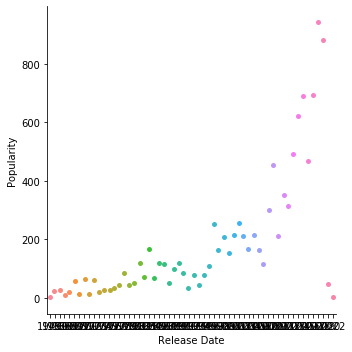

In [28]:
sns.catplot(data=df1, x='Release Date', y='Popularity', )

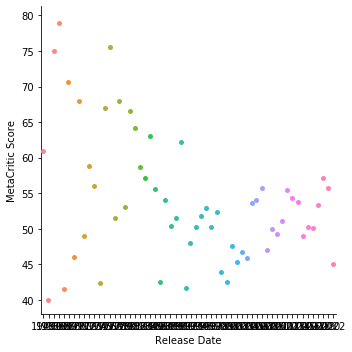

In [33]:
sns.catplot(data=df2, x='Release Date', y='MetaCritic Score')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#release year vs popularity
plt.plot(kind='bar',)



# sns.barplot(data=df, x='Release Date', y='MetaCritic Score', kind='bar')

In [ ]:
#Genre ID vs Popularity


sns.barplot(data=df, y='Popularity', x='Release Date')

In [ ]:
cursor.execute('''SELECT ID FROM The_Big_Table;
''')

In [ ]:
ID_list = cursor.fetchall()

In [ ]:
movie_id_list = []

In [ ]:
movie_id_list = [x[0] for x in ID_list]

In [ ]:
movie_id_list